In [1]:
%matplotlib inline

import cProfile
from IPython.display import Image
import importlib
import math
import matplotlib
import matplotlib.pyplot as plt
import os
import random
import subprocess
import time 

# The following algorithm will compute the points on a circle for us

In [2]:
# Python3 program for implementing  
# Mid-Point Circle Drawing Algorithm
# Adapted from:
# https://www.geeksforgeeks.org/mid-point-circle-drawing-algorithm/
# https://en.wikipedia.org/wiki/Midpoint_circle_algorithm
  
class SlowCircleDrawer:
    def __init__(self):
        pass

    def computeTheta(self, x,y, x_centre, y_centre):
        return math.atan2(x-x_centre, y-y_centre)
    
    def sortedInsert(self, theList, x, y, x_centre, y_centre):
        for index, value in enumerate(theList):
            oldTheta = self.computeTheta(value[0],value[1],x_centre,y_centre)
            newTheta = self.computeTheta(x,y, x_centre, y_centre)
            if oldTheta > newTheta:
                theList.insert(index, (x,y))
                return theList
        theList.append((x,y))
        return theList


    def midPointCircleDraw(self,x_centre, y_centre, r): 

        x = r 
        y = 0
        points = []

        # Printing the initial point the  
        # axes after translation  
        points = self.sortedInsert( points,
                     x + x_centre, y + y_centre,
                     x_centre, y_centre)

        # When radius is zero only a single  
        # point be printed  
        if (r > 0) : 

            points = self.sortedInsert( points, 
                                    -x + x_centre, -y + y_centre,
                                    x_centre, y_centre)  

            points = self.sortedInsert( points, 
                                    y + x_centre,  x + y_centre, 
                                    x_centre, y_centre)  

            points = self.sortedInsert( points, 
                                    -y + x_centre, -x + y_centre,
                                    x_centre, y_centre)  

        # Initialising the value of P  
        P = 1 - r  


        while x > y: 

            y += 1

            # Mid-point inside or on the perimeter 
            if P <= 0:  
                P = P + 2 * y + 1

            # Mid-point outside the perimeter  
            else:          
                x -= 1
                P = P + 2 * y - 2 * x + 1

            # All the perimeter points have  
            # already been printed  
            if (x < y): 
                break

            # Printing the generated point its reflection  
            # in the other octants after translation  
            points = self.sortedInsert( points,
                                      x + x_centre, y + y_centre,
                                      x_centre, y_centre)  

            points = self.sortedInsert( points,
                                      -x + x_centre, y + y_centre,
                                      x_centre, y_centre) 

            points = self.sortedInsert( points,
                                      x + x_centre, -y + y_centre,
                                      x_centre, y_centre) 

            points = self.sortedInsert( points,
                                      -x + x_centre, -y + y_centre, 
                                      x_centre, y_centre) 


            # If the generated point on the line x = y then  
            # the perimeter points have already been printed  
            if x != y: 

                points = self.sortedInsert( points,
                                          y + x_centre, x + y_centre,
                                          x_centre, y_centre)  

                points = self.sortedInsert( points,
                                          -y + x_centre, x + y_centre,
                                          x_centre, y_centre) 

                points = self.sortedInsert( points,
                                          y + x_centre, -x + y_centre,
                                          x_centre, y_centre) 

                points = self.sortedInsert( points,
                                          -y + x_centre, -x + y_centre, 
                                          x_centre, y_centre) 


        #repeat the first point to make the circle complete
        points.append(points[0])

        return points

    def draw_circles(self, inputs):
        circles = []
        for x,y,r in inputs:
            circle = self.midPointCircleDraw(x,y,r)
            circles.append( circle )
        return circles


## Let's try it out with a simple circle of radius=3, centered at x=5,y=5

Circle Points:[(4, 2), (3, 3), (2, 4), (2, 5), (2, 6), (3, 7), (4, 8), (5, 8), (6, 8), (7, 7), (8, 6), (8, 5), (8, 4), (7, 3), (6, 2), (5, 2), (4, 2)]


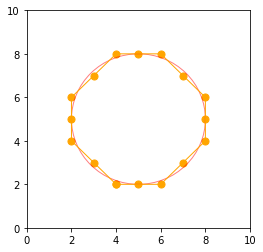

In [3]:
#create our circle drawer
cd = SlowCircleDrawer()

#ask it to draw a circle
circle = cd.midPointCircleDraw( 5,5,3)
print ("Circle Points:" + str(circle))

#plot those points
xs,ys = zip(*circle)

plt.figure(figsize=(4,4))
plt.scatter(xs,ys, s=50, color='orange')
plt.plot(xs,ys, linewidth=1, color='orange')
c1 = plt.Circle((5,5), radius=3, linewidth=1, color='red', fill=False, alpha=0.5)
plt.gca().add_artist(c1)
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

## Now let's plot multiple circles

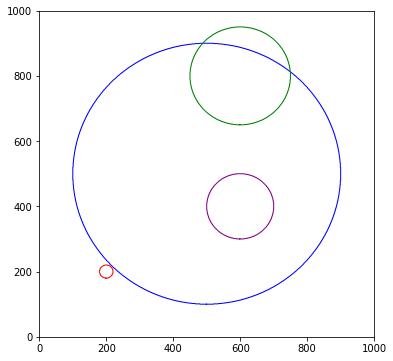

In [74]:
inputs = [ (200,200,20),
           (500,500,400),
           (600,800,150),
           (600,400,100)]

cd = SlowCircleDrawer()
circles = cd.draw_circles(inputs)    

colors=[ 'red', 'blue', 'green', 'purple']
plt.figure(figsize=(6,6))    
for circle, color in zip(circles, colors):
    xs,ys = zip(*circle)
    plt.plot(xs,ys, linewidth=1, color=color)
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.show()


## Now let's draw 10 random circles

(This takes a few seconds)

In [38]:
# The following code was used to generate these inputs:
#rand_inputs = []
#for i in range(0,12):
#    rand_inputs.append( (
#        random.randint(0,1000),
#        random.randint(0,1000),
#        random.randint(0,300) ) )
#print (rand_inputs) 
rand_inputs = [(975, 979, 279), (861, 149, 209), (362, 551, 218), 
               (710, 133, 116), (458, 266, 135), (742, 955, 83), 
               (245, 959, 191), (99, 361, 170), (590, 1, 174), 
               (998, 600, 207), (261, 562, 296), (560, 184, 228)]


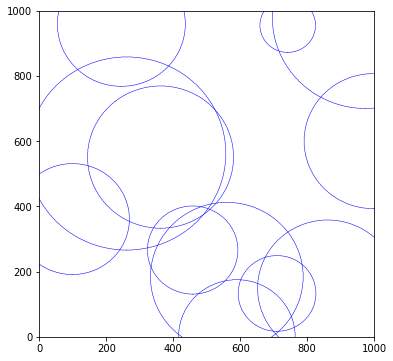

Total Circle Drawing Time: 3.210189664999689 Seconds


In [67]:
cd = SlowCircleDrawer()

start = time.perf_counter()
circles = cd.draw_circles(rand_inputs) 
stop = time.perf_counter()

plt.figure(figsize=(6,6))    
for circle in circles:
    xs,ys = zip(*circle)
    plt.plot(xs,ys, linewidth=0.5, color='blue')

plt.xlim([0,1000])
plt.ylim([0,1000])
plt.show()

#The elapsed time is the difference between the two times
delay = stop-start
print('Total Circle Drawing Time: ' + str(delay) + ' Seconds')

## For me, that was ~3 seconds.  


## Let's use cProfile to figure out where that time is going.

In [41]:
cProfile.run('cd.draw_circles(rand_inputs) ')

         15573096 function calls in 5.791 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  7773496    2.339    0.000    3.577    0.000 <ipython-input-10-073ff0b45b9b>:11(computeTheta)
        1    0.000    0.000    5.790    5.790 <ipython-input-10-073ff0b45b9b>:118(draw_circles)
    13032    2.194    0.000    5.776    0.000 <ipython-input-10-073ff0b45b9b>:14(sortedInsert)
       12    0.014    0.001    5.790    0.483 <ipython-input-10-073ff0b45b9b>:25(midPointCircleDraw)
        1    0.001    0.001    5.791    5.791 <string>:1(<module>)
        1    0.000    0.000    5.791    5.791 {built-in method builtins.exec}
  7773496    1.238    0.000    1.238    0.000 {built-in method math.atan2}
       36    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
    13020    0.005    0.000    0.005    0.000 {method 'insert' 

### That can be a bit hard to read, so let's repeat but display the information graphically:

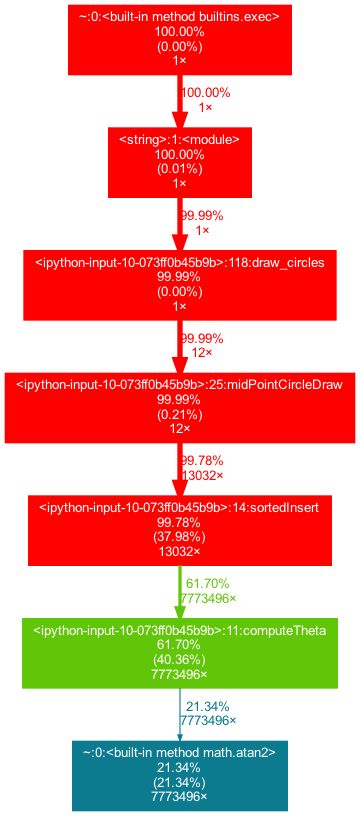

In [42]:
cProfile.run('cd.draw_circles(rand_inputs) ', 'circles.pstats')
subprocess.call(['python3', 'gprof2dot.py', '-f', 'pstats', './circles.pstats', '-o', 'circles.dot' ])
subprocess.call(['dot', '-Tpng', '-o', 'circles.png', 'circles.dot' ])
Image('circles.png')

## Now let's import a new Circle Drawing class, which is in MyCircleDrawer.py

### We can time and compare the results of the two.  

In [80]:
def circles_are_the_same(circles1,circles2):
    for circle1, circle2 in zip(circles1,circles2):
        for point1, point2 in zip(circle1,circle2):
            if (point1[0] != point2[0]): return False
            if (point1[1] != point2[1]): return False                
    return True

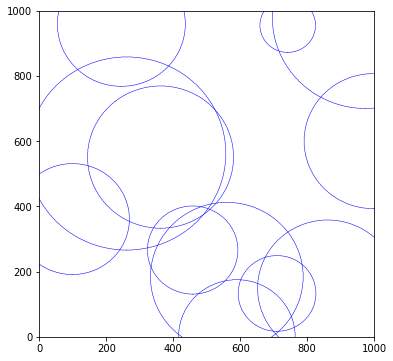

Total Circle Drawing Time: 3.2896126040000127 Seconds
The circles ARE NOT the same!


In [81]:
import MyCircleDrawer
importlib.reload(MyCircleDrawer)

my_cd = MyCircleDrawer.MyCircleDrawer()


# time the circle drawing
start = time.perf_counter()
my_circles = my_cd.draw_circles(rand_inputs)
stop = time.perf_counter()


plt.figure(figsize=(6,6))    
for circle in my_circles:
    xs,ys = zip(*circle)
    plt.plot(xs,ys, linewidth=0.5, color='blue')
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.show()

#The elapsed time is the difference between the two times
delay = stop-start
print('Total Circle Drawing Time: ' + str(delay) + ' Seconds')

the_same = circles_are_the_same(circles, my_circles)    
the_same = 'ARE' if the_same else 'ARE NOT'
print('The circles ' + the_same +' the same!')

## Here's what happens when the circles are NOT the same

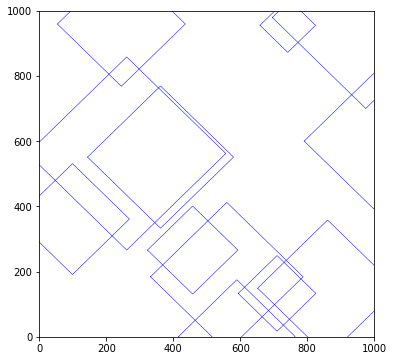

Total Circle Drawing Time: 0.000511296999775368 Seconds
The circles ARE NOT the same!


In [82]:
import BadCircleDrawer
importlib.reload(BadCircleDrawer)

bad_cd = BadCircleDrawer.BadCircleDrawer()




# time the circle drawing
start = time.perf_counter()
bad_circles = bad_cd.draw_circles(rand_inputs)
stop = time.perf_counter()


plt.figure(figsize=(6,6))    
for circle in bad_circles:
    xs,ys = zip(*circle)
    plt.plot(xs,ys, linewidth=0.5, color='blue')
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.show()

#The elapsed time is the difference between the two times
delay = stop-start
print('Total Circle Drawing Time: ' + str(delay) + ' Seconds')

the_same = circles_are_the_same(circles, bad_circles)    
the_same = 'ARE' if the_same else 'ARE NOT'
print('The circles ' + the_same +' the same!')

# Your assignment 

- ## accelerate MyCircleDrawer 
- ## Correctly produce the same circle outputs as SlowCircleDrawer
- ## But do so to hit the performance targets on the autograder.  